# EHealth 705

## Python Tutorial: Regression Analysis

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [Overview of basic concepts in regression analysis.](#regression)
2. [Regression model in Python](#model)
3. [Exercise: Apply linear regression to a health data set.](#Practical_exercise)
4. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
5. [Assignment: Build and evaluate regression models using a health dataset.](#Assignment)



#### Date : Mar  21th, 2024

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import math
import pingouin as pg
import string

# warnings.filterwarnings('ignore')  # This will ignore all warnings

import scipy.stats as stats
from scipy.optimize import curve_fit
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import model_selection
from sklearn import datasets, linear_model   
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Overview of basic concepts in regression analysis. <a id="regression"></a>

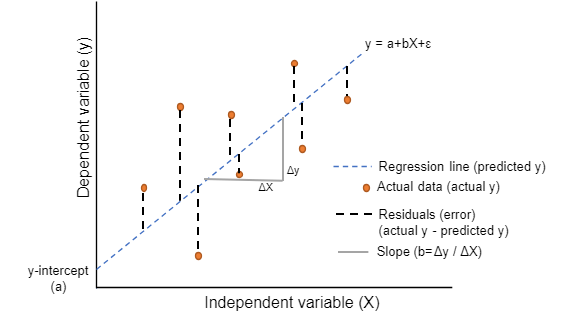


## What is Linear Regression?


regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’) and one or more independent variables (often called ‘predictors’, ‘covariates’, or ‘features’).

There are two kinds of linear models, simple and multiple linear models, the difference is from the number of independent variables, where a simple only one variable but multiple is more than one, in this article I will explain simple linear regression. 

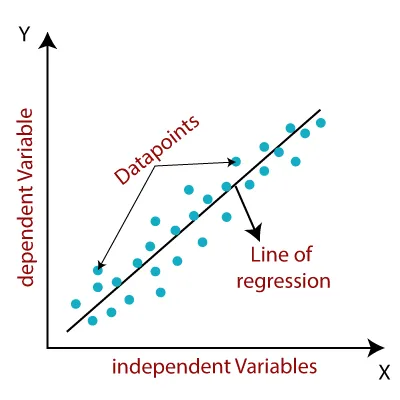


It predicts a linear relationship between an independent variable (y), based on the given dependant variables (x). Such that the independent variable (y) has the lowest cost.

assume that we have some data, and when we plot that data on a scatter graph, we get a figure something like:
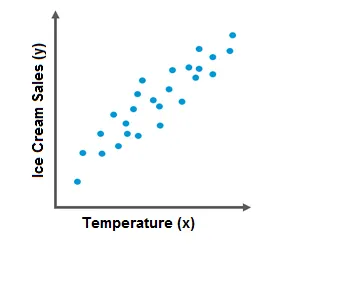

Now, if we apply linear regression to it then it will compute a relationship/line between data such that the line is closest to all the points in the data. In other words, it will compute the relationship between temperature (x) and sales of Ice cream (y) and will tell us that at what temperature the sales will be greater and at what temperature the sales will be less.


The terminology you will often listen related with regression analysis is:

- Dependent variable or target variable: Variable to predict.
- Independent variable or predictor variable: Variables to estimate the dependent variable.
- Outlier: Observation that differs significantly from other observations. It should be avoided since it may hamper the result.
- Multicollinearity: Situation in which two or more independent variables are highly linearly related.
- Homoscedasticity or homogeneity of variance: Situation in which the error term is the same across all values of the independent variables.

## Assumptions

there were some assumptions for linear regression:

* Linearity: The relationship between the dependent variable and the independent variables must be linear. This means that the line that best fits the data should be a straight line.
* Independence: The observations in the data set must be independent of each other. This means that one observation should not be able to predict another observation. You can also formally test if this assumption is met using the Durbin-Watson test.
* Homoscedasticity: The variance of the error terms should be constant across all levels of the independent variables. This means that the spread of the data around the regression line should be the same at all levels of the independent variables. To check homoscedasticity you can plot the residuals (errors) with the independent variable.
* Normality: The error terms should be normally distributed. This means that the distribution of the error terms should be bell-shaped.
* No multicollinearity: The independent variables should not be highly correlated with each other. Multicollinearity can occur when two or more independent variables are measuring the same thing.



## Simple Linear Regression

For simple linear regression, the equation is:
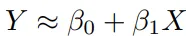


where:

Y is the dependent variable
X is the independent variable
β0 is the intercept (the value of y when x is 0)
β1 is the slope of the line




Given two set of observations, $x$ and $y$, we want to test the hypothesis that $y$ is a linear function of $x$. In other terms:
$$
y=x * \text { coef }+ \text { intercept }+\epsilon
$$



 the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.[^noteepsilon] Written using mathematics, the residuals are defined as:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

which in turn means that we can write down the complete linear regression model as:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$


where $e$ is observation noise. We will use the statsmodels module to:
1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2. Test that coef is non zero.

In [2]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})


In [3]:
model = ols("y ~ x", data).fit()

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           8.56e-08
Time:                        15:00:43   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

# Regression model in Python <a id="model"></a>

In the follwoing data set, we were trying to find out why Dan is so very grumpy all the time, and our working hypothesis was that I’m not getting enough sleep.

In [4]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


[Text(0.5, 1.0, 'Grumpiness and sleep'),
 Text(0, 0.5, 'My grumpiness (0-100)'),
 Text(0.5, 0, 'My sleep (hours)')]

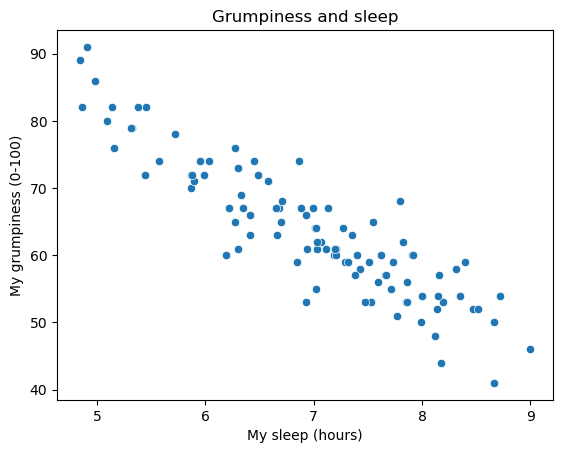

In [5]:


fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')


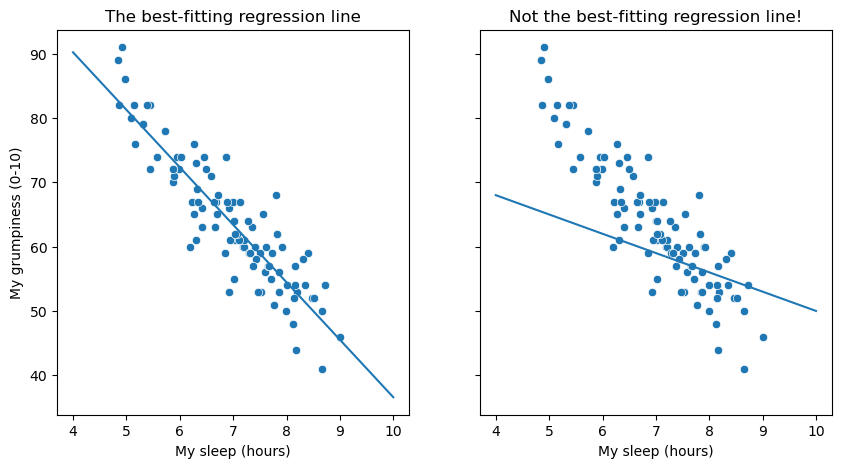

In [6]:
# find the regression coefficients to allow manually plotting the line
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

x = np.linspace(4,10)


sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x,-3*x+80)

In [7]:
modx = pg.linear_regression(df['dan_grump'], df['dan_sleep'])
modx.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,12.78,0.28,45.27,0.0,0.82,0.81,12.22,13.34
1,dan_grump,-0.09,0.00,-20.85,0.0,0.82,0.81,-0.10,-0.08


> The estimated regression coefficients, $\hat{b}_0$ and $\hat{b}_1$ are those that minimise the sum of the squared residuals, which we could either write as $\sum_i (Y_i - \hat{Y}_i)^2$ or as $\sum_i {\epsilon_i}^2$.

there's actually more than one way to estimate a regression model -- the more technical name for this estimation process is **_ordinary least squares (OLS) regression_**.  

At this point, we now have a concrete definition for what counts as our "best" choice of regression coefficients, $\hat{b}_0$ and $\hat{b}_1$. The natural question to ask next is,  if our optimal regression coefficients are those that minimise the sum squared residuals, how do we *find* these wonderful numbers? 

<Figure size 1200x800 with 0 Axes>

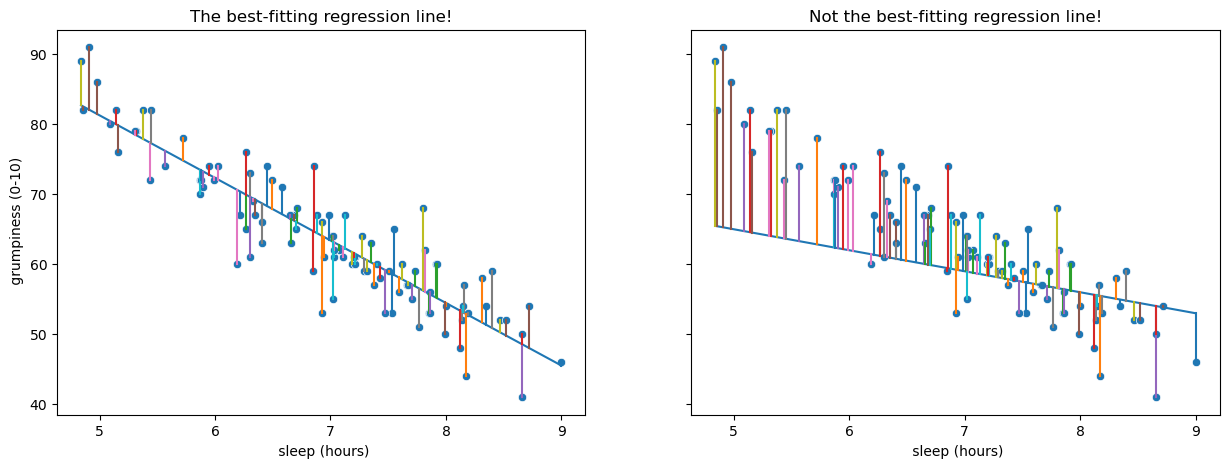

In [8]:
fig = plt.figure(figsize=(12, 8))


xData = df['dan_sleep']
yData = np.array(df['dan_grump'])


# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

data = pd.DataFrame({'x': xData,
                     'y': yData})

# plot data points
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line!")
fig.axes[0].set_xlabel(" sleep (hours)")
fig.axes[0].set_ylabel(" grumpiness (0-10)")

# add regression line
xModel = np.linspace(min(xData), max(xData))
yModel = func(xModel, *fittedParameters)

axes[0].plot(xModel, yModel)

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    axes[0].plot(lineXdata, lineYdata)

    
#####

# create poor-fitting model
badParameters = np.array([-3, 80])
badPredictions = func(xData, *badParameters) 

bad_xModel = np.linspace(min(xData), max(xData))
bad_yModel = func(bad_xModel, *badParameters)

# plot data with poor-fitting model
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel(" sleep (hours)")
fig.axes[1].set_ylabel(" grumpiness (0-10)")
fig.axes[1].plot(bad_xModel, bad_yModel)  

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) 
    lineYdata = (yData[i], badPredictions[i]) 
    axes[1].plot(lineXdata, lineYdata)
  
    



In [9]:

mod1 = pg.linear_regression(df['dan_sleep'], df['dan_grump'])

# Display results, rounded to two decimal places.
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


As is its way, `pingouin` gives us a nice simple table, with a lot of information. Most importantly for now, we can see that `pingouin` has caclulated the intercept $\hat{b}_0 = 125.96$ and the slope $\hat{b}_1 = -8.94$. In other words, the best-fitting regression line that I plotted in {numref}`fig-sleep_regressions_1` has this formula: 

$$
\hat{Y}_i = -8.94 \ X_i + 125.96
$$ 

## Simple Linear Regression Model


We will use the INCOMEINDEx column - an index of real per capita income - as the independent variable and the WORLDCONSUMPTION column - the world consumption of copper in millions of kilograms - as the dependent variable:

Separate out the feature (aka the independent or exogenous variable) and the target (aka the dependent or endogenous variable):


In [10]:
dataset = sm.datasets.copper.load_pandas()

Text(0.5, 0, 'Index of Real per Capita Income (Base 1970)')

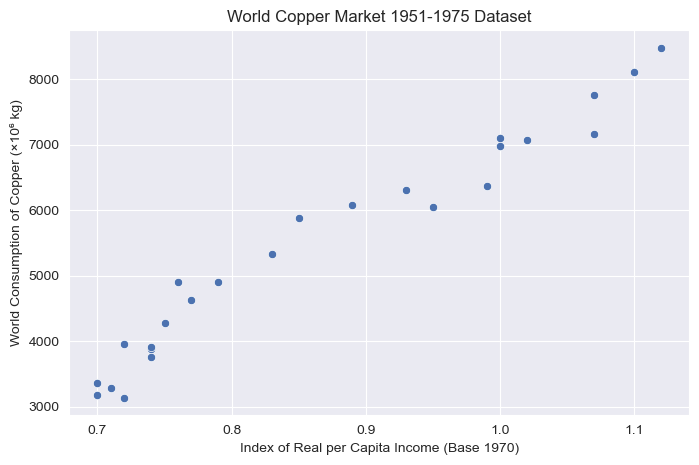

In [11]:
# Plot
fig = plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.set_palette('deep')
ax = plt.axes()
sns.scatterplot(dataset['data'], x='INCOMEINDEX', y='WORLDCONSUMPTION')
plt.title('World Copper Market 1951-1975 Dataset')
plt.ylabel('World Consumption of Copper (×10⁶ kg)')
plt.xlabel('Index of Real per Capita Income (Base 1970)')

In [12]:
# Separate out the feature (exogenous variable)
X = dataset['exog']['INCOMEINDEX']
# Reshape from a 1D array into a 2D array
X = np.array(X).reshape(-1, 1)
# Separate out the target (endogenous variable)
y = dataset['endog']

In [13]:
# Create the model
regr = linear_model.LinearRegression()
# Train the model
regr.fit(X, y)

LinearRegression()

In [14]:
# Use the model to make a prediction
X_fitted = np.array([np.min(X), np.max(X)]).reshape(-1, 1)
y_fitted = regr.predict(X_fitted)

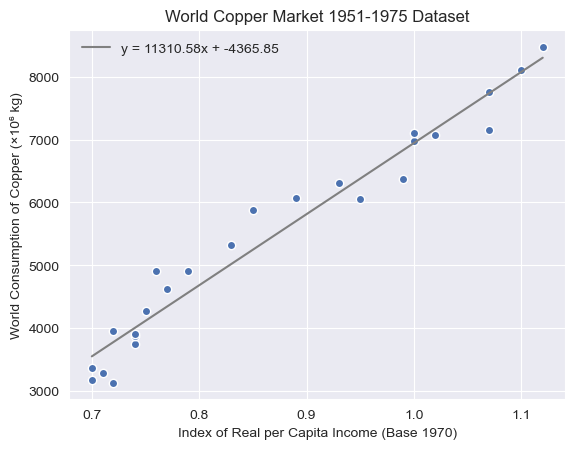

In [15]:
# Plot
plt.scatter(X, y, ec='w')
label = f'y = {np.round(regr.coef_[0], 2)}x + {np.round(regr.intercept_, 2)}'
plt.plot(X_fitted, y_fitted, c='gray', label=label)
plt.title('World Copper Market 1951-1975 Dataset')
plt.ylabel('World Consumption of Copper (×10⁶ kg)')
plt.xlabel('Index of Real per Capita Income (Base 1970)')
plt.legend(frameon=False)


### Example 2: Using Training and Testing Sets
Split the dataset up so that 70% is used for training and 30% is used for testing:

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=20230922, test_size=0.3
)

In [17]:
#Create and fit a new model:


# Create the model
regr = linear_model.LinearRegression()
# Train the model
regr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Use the model to make a prediction
y_pred = regr.predict(X_test)

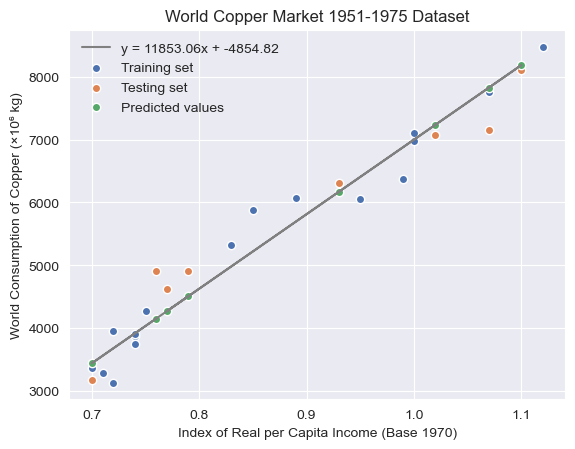

In [19]:
# Plot
label = f'y = {np.round(regr.coef_[0], 2)}x + {np.round(regr.intercept_, 2)}'
plt.plot(X_test, y_pred, c='gray', label=label)
plt.scatter(X_train, y_train, ec='w', label='Training set')
plt.scatter(X_test, y_test, ec='w', label='Testing set')
plt.scatter(X_test, y_pred, ec='w', label='Predicted values')
plt.title('World Copper Market 1951-1975 Dataset')
plt.ylabel('World Consumption of Copper (×10⁶ kg)')
plt.xlabel('Index of Real per Capita Income (Base 1970)')
plt.legend(frameon=False)


## Multiple Linear Regression

Multiple regression is conceptually very simple. All we do is add more terms to our regression equation. Let's suppose that we've got two variables that we're interested in; perhaps we want to use both `dan_sleep` and `baby_sleep` to predict the `dan_grump` variable. As before, we let $Y_i$ refer to my grumpiness on the $i$-th day. But now we have two $X$ variables: the first corresponding to the amount of sleep I got and the second corresponding to the amount of sleep my son got. So we'll let $X_{i1}$ refer to the hours I slept on the $i$-th day, and $X_{i2}$ refers to the hours that the baby slept on that day. If so, then we can write our regression model like this:

$$
Y_i = b_2 X_{i2} + b_1 X_{i1} + b_0 + \epsilon_i
$$


As before, $\epsilon_i$ is the residual associated with the $i$-th observation, $\epsilon_i = {Y}_i - \hat{Y}_i$. In this model, we now have three coefficients that need to be estimated: $b_0$ is the intercept, $b_1$ is the coefficient associated with my sleep, and $b_2$ is the coefficient associated with my son's sleep. However, although the number of coefficients that need to be estimated has changed, the basic idea of how the estimation works is unchanged: our estimated coefficients $\hat{b}_0$, $\hat{b}_1$ and $\hat{b}_2$ are those that minimise the sum squared residuals. 

In [20]:
 mod2 = pg.linear_regression(df[['dan_sleep', 'baby_sleep']], df['dan_grump'])
    


In [21]:
predictors = ['dan_sleep', 'baby_sleep']
outcome = 'dan_grump'

mod2 = pg.linear_regression(df[predictors], df[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55


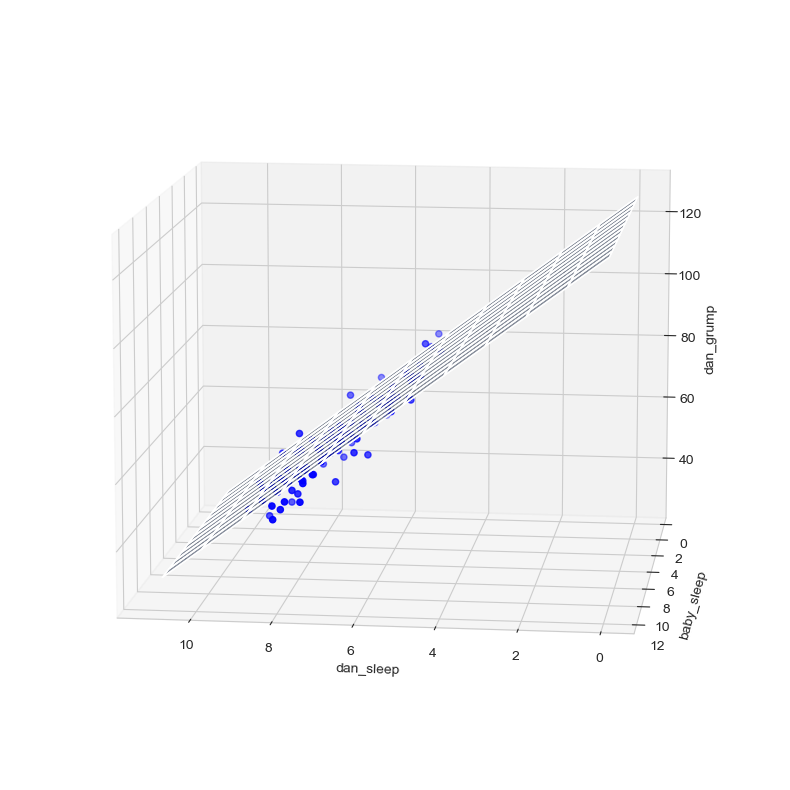

In [22]:


# style the plot
sns.set_style("whitegrid")

# construct 3d plot space
fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection = '3d')

# define axes
x = df['dan_sleep']
y = df['baby_sleep']
z = df['dan_grump']

# set axis labels
ax.set_xlabel("dan_sleep")
ax.set_ylabel("baby_sleep")
ax.set_zlabel("dan_grump")


# get intercept and regression coefficients from the lmm model
coefs = list(mod2['coef'][1:])
intercept = mod2['coef'][0]

# create a 3d plane representation of the lmm predictions
xs = np.tile(np.arange(12), (12,1))
ys = np.tile(np.arange(12), (12,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)

# plot the data and plane
ax.plot_surface(xs,ys,zs, alpha=0.01)
ax.scatter(x, y, z, color = 'blue')

# adjust the viewing angle
ax.view_init(11,97)


### The $R^2$ value

Once again, let's wrap a little bit of mathematics around this. First, we've got the sum of the squared residuals:

$$
\mbox{SS}_{res} = \sum_i (Y_i - \hat{Y}_i)^2
$$

which we would hope to be pretty small. Specifically, what we'd like is for it to be very small in comparison to the total variability in the outcome variable, 

$$
\mbox{SS}_{tot} = \sum_i (Y_i - \bar{Y})^2
$$


While we're here, let's calculate these values in Python. Just to make my Python commands look a bit more similar to the mathematical equations, I'll create variables `X` and `Y`:


In [23]:
X = df['dan_sleep'] # the predictor
Y = df['dan_grump'] # the outcome

In [24]:
mod1 = pg.linear_regression(X, Y)
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


In this output, we can see that Python has calculated an intercept of 125.96 and a regression coefficient ($beta$) of -8.94. So for every hour of sleep I get, the model estimates that this will correspond to a decrease in grumpiness of about 9 on my incredibly scientific grumpiness scale. We can use this information to calculate $\hat{Y}$, that is, the values that the model _predicts_ for the outcome measure, as opposed to $Y$, which are the actual data we observed. So, for each value of the predictor variable X, we multiply that value by the regression coefficient -8.84, and add the intercept 125.97:

In [25]:

Y_pred = -8.94 * X + 125.97

In [26]:
SS_resid = sum( (Y - Y_pred)**2 )
SS_resid

1838.7224883200004

In [27]:
SS_tot = sum( (Y - np.mean(Y))**2 )
SS_tot

9998.590000000002


Hm. Well, it's a much bigger number than the last one, so this does suggest that our regression model was making good predictions. But it's not very interpretable. 

Perhaps we can fix this. What we'd like to do is to convert these two fairly meaningless numbers into one number. A nice, interpretable number, which for no particular reason we'll call $R^2$. What we would like is for the value of $R^2$ to be equal to 1 if the regression model makes no errors in predicting the data. In other words, if it turns out that the residual errors are zero, that is, if $\mbox{SS}_{res} = 0$, then we expect $R^2 = 1$. Similarly, if the model is completely useless, we would like $R^2$ to be equal to 0. What do I mean by "useless"? Tempting as it is demand that the regression model move out of the house, cut its hair and get a real job, I'm probably going to have to pick a more practical definition: in this case, all I mean is that the residual sum of squares is no smaller than the total sum of squares, $\mbox{SS}_{res} = \mbox{SS}_{tot}$. Wait, why don't we do exactly that? In fact, the formula that provides us with our $R^2$ value is pretty simple to write down,

$$
R^2 = 1 - \frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}}
$$




The $R^2$ value, sometimes called the **_coefficient of determination_** has a simple interpretation: it is the *proportion* of the variance in the outcome variable that can be accounted for by the predictor. So in this case, the fact that we have obtained $R^2 = .816$ means that the predictor (`my_sleep`) explains 81.6\% of the variance in the outcome (`my_grump`). 

Naturally, you don't actually need to type in all these commands yourself if you want to obtain the $R^2$ value for your regression model. And as you have probably already noticed, `pingouin` calculates $R^2$  for us without even being asked to. But there's another property of $R^2$ that I want to point out. 



In [28]:
R2 = 1- (SS_resid / SS_tot)
R2

0.816101821524835

### The relationship between regression and correlation

At this point we can revisit my earlier claim that regression, in this very simple form that I've discussed so far, is basically the same thing as a correlation. Previously, we used the symbol $r$ to denote a Pearson correlation. Might there be some relationship between the value of the correlation coefficient $r$ and the $R^2$ value from linear regression? Of course there is: the squared correlation $r^2$ is identical to the $R^2$ value for a linear regression with only a single predictor. To illustrate this, here's the squared correlation:

In [29]:

r = X.corr(Y)  # calculate the correlation
r**2    # print the squared correlation

0.8161027191478786

In other words, running a Pearson correlation is more or less equivalent to running a linear regression model that uses only one predictor variable.

### The adjusted $R^2$ value

One final thing to point out before moving on. It's quite common for people to report a slightly different measure of model performance, known as "adjusted $R^2$". The motivation behind calculating the adjusted $R^2$ value is the observation that adding more predictors into the model will *always* cause the $R^2$ value to increase (or at least not decrease). The adjusted $R^2$ value introduces a slight change to the calculation, as follows. For a regression model with $K$ predictors, fit to a data set containing $N$ observations, the adjusted $R^2$ is:

$$
\mbox{adj. } R^2 = 1 - \left(\frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}} \times \frac{N-1}{N-K-1} \right)
$$


This adjustment is an attempt to take the degrees of freedom into account. The big advantage of the adjusted $R^2$ value is that when you add more predictors to the model, the adjusted $R^2$ value will only increase if the new variables improve the model performance more than you'd expect by chance. The big disadvantage is that the adjusted $R^2$ value *can't* be interpreted in the elegant way that $R^2$ can. $R^2$ has a simple interpretation as the proportion of variance in the outcome variable that is explained by the regression model; to my knowledge, no equivalent interpretation exists for adjusted $R^2$. 

An obvious question then, is whether you should report $R^2$ or adjusted $R^2$. This is probably a matter of personal preference. If you care more about interpretability, then $R^2$ is better. If you care more about correcting for bias, then adjusted $R^2$ is probably better. 



## Outliers!!!

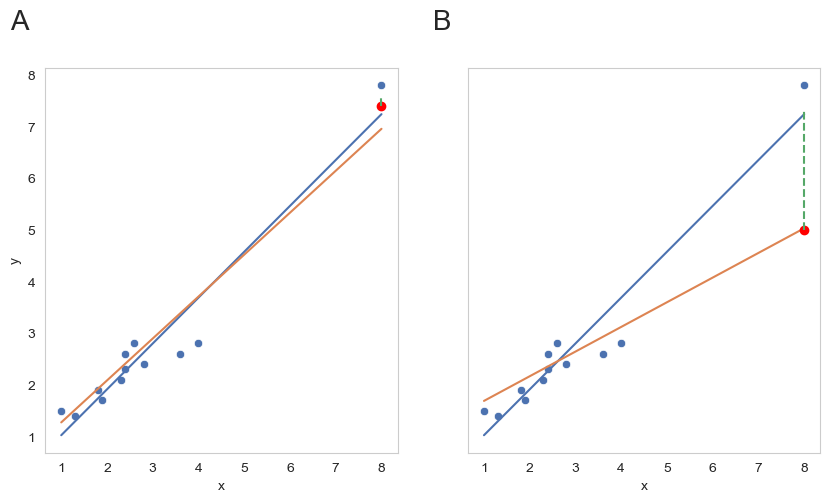

In [30]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.4]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)



sns.scatterplot(data = df, x='x', y='y', ax = axes[0])

# add regression line
axes[0].plot(xModel, yModel)


initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

axes[0].plot(xModel, yModel)
axes[0].plot(8, 7.4, 'ro')
axes[0].plot([8, 8], [7.4 ,7.6], linestyle='dashed')
axes[0].grid(False)

# Plot 2

df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 5]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)




sns.scatterplot(data = df, x='x', y='y', ax = axes[1])

# add regression line
axes[1].plot(xModel, yModel)


initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

axes[1].plot(xModel, yModel)
axes[1].plot(8, 5, 'ro')
axes[1].plot([8, 8], [5 ,7.3], linestyle='dashed')
axes[1].grid(False)


for n, ax in enumerate(axes):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20)



# Exercise: Apply linear regression to a health data set.<a id="Practical_exercise"></a>

In [31]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


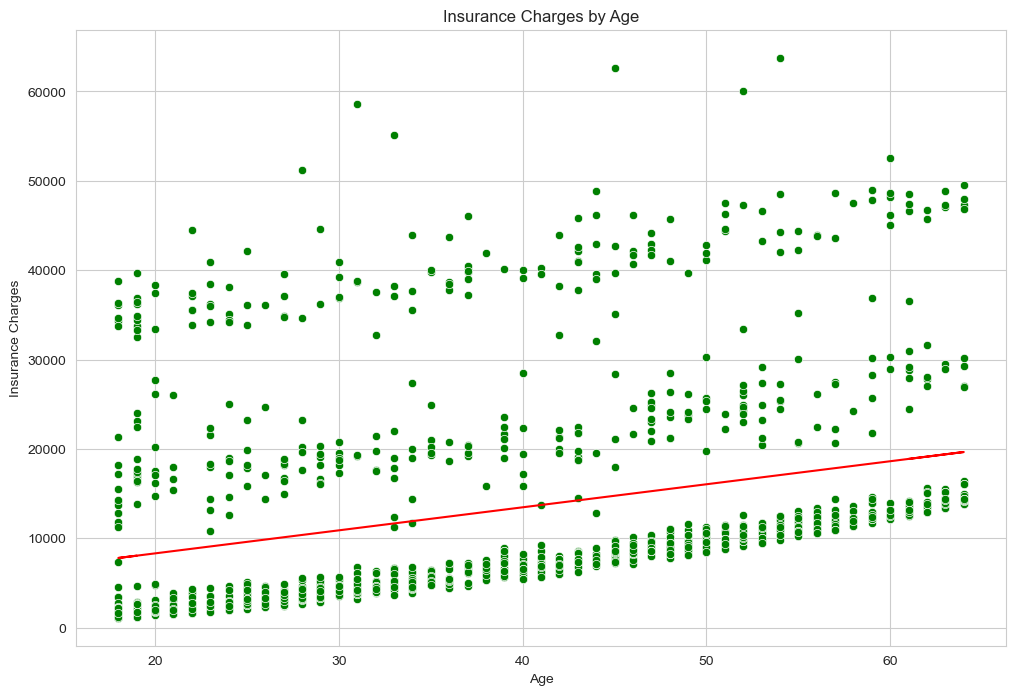

In [32]:

# Assuming df is your DataFrame.
age = df['age'].values
premiums = df['charges'].values

# Reshape age for the model
age_vector = age.reshape(-1, 1)

# Create and fit the model
model = LinearRegression().fit(age_vector, premiums)
prediction = model.predict(age_vector)

# Set the color palette
sns.set_palette(['green'])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plotting the scatter plot
sns.scatterplot(x=age, y=premiums)

# Plotting the prediction line
plt.plot(age, prediction, color="red")

# Adding titles and labels
plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')

# Displaying the plot
plt.show()


In [33]:
df['age'].corr(df['charges'])


0.2990081933306476

[Text(0.5, 1.0, 'Insurance charges related to BMI'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Insurance charges')]

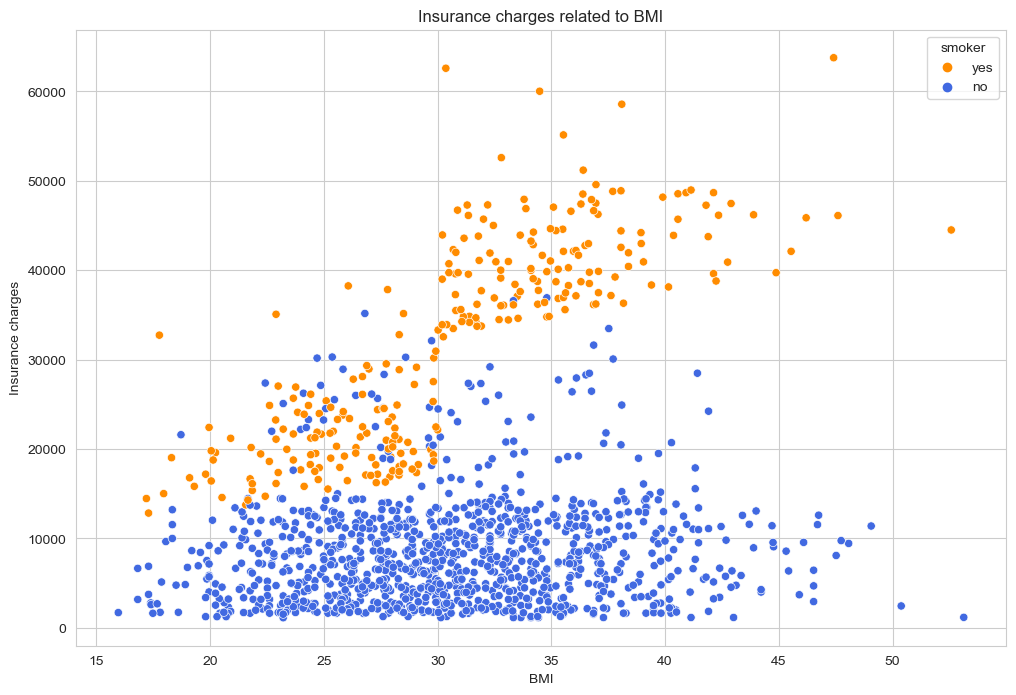

In [34]:

# Set the size of the plot
plt.figure(figsize=(12, 8))
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
ax.set(title = 'Insurance charges related to BMI',
      xlabel = 'BMI',
      ylabel = 'Insurance charges')




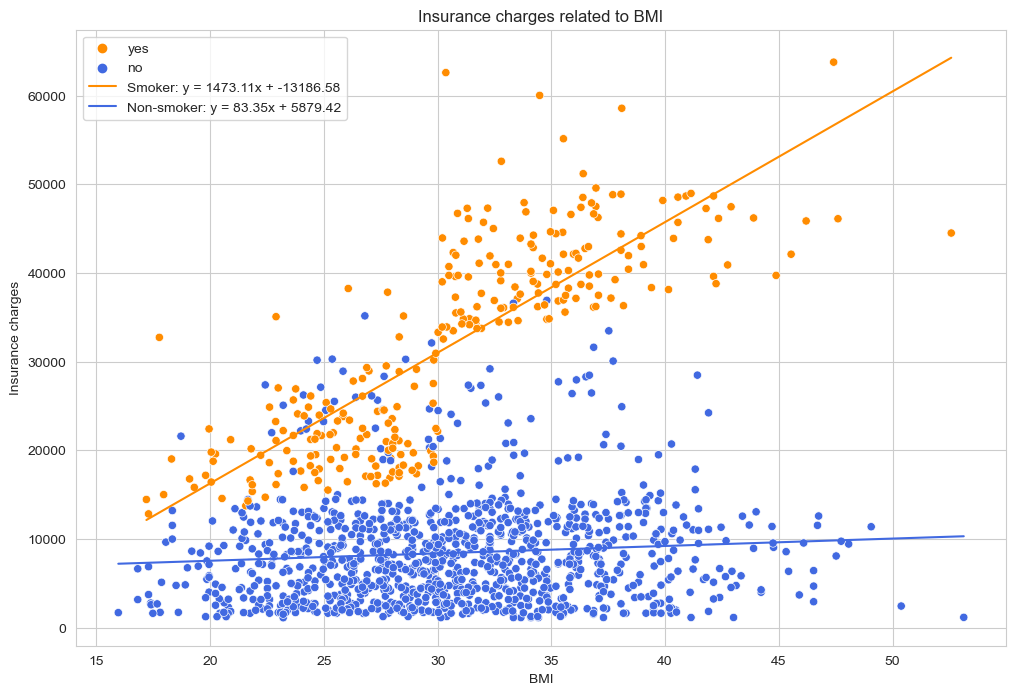

In [35]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Separate the DataFrame into two based on 'smoker' column
smokers_df = df[df['smoker'] == 'yes'].copy()
nonsmokers_df = df[df['smoker'] == 'no'].copy()

# Perform linear regression for smokers and non-smokers
smokers_lr = pg.linear_regression(smokers_df[['bmi']], smokers_df['charges']).round(3)
nonsmokers_lr = pg.linear_regression(nonsmokers_df[['bmi']], nonsmokers_df['charges']).round(3)

# Extract coefficients
smokers_intercept = smokers_lr.at[0, 'coef']
smokers_slope = smokers_lr.at[1, 'coef']

nonsmokers_intercept = nonsmokers_lr.at[0, 'coef']
nonsmokers_slope = nonsmokers_lr.at[1, 'coef']

# Calculate predicted charges based on the regression model
smokers_df.loc[:, 'predicted_charges'] = smokers_intercept + smokers_slope * smokers_df['bmi']
nonsmokers_df.loc[:, 'predicted_charges'] = nonsmokers_intercept + nonsmokers_slope * nonsmokers_df['bmi']

# Create scatterplot
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

# Plot regression lines and display the equation on the plot
sns.lineplot(x=smokers_df['bmi'], y=smokers_df['predicted_charges'], color='darkorange', ax=ax, label=f'Smoker: y = {smokers_slope:.2f}x + {smokers_intercept:.2f}')
sns.lineplot(x=nonsmokers_df['bmi'], y=nonsmokers_df['predicted_charges'], color='#4169E1', ax=ax, label=f'Non-smoker: y = {nonsmokers_slope:.2f}x + {nonsmokers_intercept:.2f}')

# Set the title and labels
ax.set(title='Insurance charges related to BMI', xlabel='BMI', ylabel='Insurance charges')

# Annotate the regression line equations
for line in ax.lines:
    label = line.get_label()



In [36]:
# Display the results
print("Smokers Linear Regression:\n", smokers_lr, "\n")
print("Non-Smokers Linear Regression:\n", nonsmokers_lr)

Smokers Linear Regression:
        names       coef        se       T  pval    r2  adj_r2   CI[2.5%]  \
0  Intercept -13186.576  2052.885  -6.423   0.0  0.65   0.649 -17228.140   
1        bmi   1473.106    65.484  22.496   0.0  0.65   0.649   1344.187   

   CI[97.5%]  
0  -9145.013  
1   1602.026   

Non-Smokers Linear Regression:
        names      coef       se      T   pval     r2  adj_r2  CI[2.5%]  \
0  Intercept  5879.424  947.475  6.205  0.000  0.007   0.006  4020.288   
1        bmi    83.351   30.328  2.748  0.006  0.007   0.006    23.842   

   CI[97.5%]  
0    7738.56  
1     142.86  


# Q&A and Troubleshooting <a id="QA-and-Troubleshooting"></a>

#### Practical Exercise Solutions and Insights

- **Exploring Linear Regression**:
  - [Linear Regression Python Implementation](https://www.geeksforgeeks.org/linear-regression-python-implementation/)
  - [Introduction to Regression with Python](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html)
  - [Regression Analysis for Insurance Charges](https://www.kaggle.com/code/emmanueldjegou/regression-analysis-for-insurance-charges)
  - [Healthcare Insurance Analysis with Visualization](https://www.kaggle.com/code/nitishsou/healthcare-insurance-analysis-with-visualization)
  - [Linear Regression](https://www.kaggle.com/code/kpgomez/linear-regression)
  - [Predicting Medical Charges Using Linear Regression](https://www.kaggle.com/code/sarahmashhood/predicting-medical-charges-using-linear-regression)
  - [Insurance Data Modeling: Linear Regression](https://www.kaggle.com/code/galalqassas/insurance-data-modeling-linear-regression)
  - [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
  - [Simple Linear Regression in Python](https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8)
  - [Simple Linear Regression](https://rowannicholls.github.io/python/machine_learning/supervised_models/simple_linear_regression.html)
  - [Multiple Linear Regression](https://rowannicholls.github.io/python/machine_learning/supervised_models/multiple_linear_regression.html)
  - [Regression](https://ethanweed.github.io/pythonbook/05.04-regression.html)
  - [Building Statistical Models in Python](https://github.com/PacktPublishing/Building-Statistical-Models-in-Python)
  - [Statistics with Scipy](https://scipy-lectures.org/packages/statistics/index.html)
  - [Complete Guide to Linear Regression in Python](https://towardsdatascience.com/complete-guide-to-linear-regression-in-python-d95175447255)
  - [Building a Linear Regression in Python Step by Step](https://medium.com/@polanitzer/building-a-linear-regression-in-python-step-by-step-94caeb0a4f18)
  - [Simple Linear Regression Clearly Explained](https://python.plainenglish.io/simple-linear-regression-clearly-explained-0cd416d398d4)
  - [Introduction to Regression Analysis](https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3)
  - [Step-by-Step Regression Analysis](https://medium.com/@mygreatlearning/step-by-step-regression-analysis-f7e3e3ebf296)
  - [Introduction to Statistical Learning Summary Python](https://github.com/shilpa9a/Introduction_to_statistical_learning_summary_python)

#### Datasets for Practice

- **Datasets for Linear Regression Exercises**:
  - [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)
  - [US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/code)


# Assignment <a id="Assignment"></a>

### Assignment 1: Ordinary Least Squares (OLS) Regression Analysis
Objective:
Perform an OLS regression analysis to evaluate the relationship between age, bmi, and the number of children with the insurance charges.

In [37]:


# OLS Regression
X = df[['age', 'bmi', 'children']]  # Independent variables
y = df['charges']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Create and fit the model
ols_model = sm.OLS(y, X).fit()

# Summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           8.80e-37
Time:                        15:01:03   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

### Assignment 2: Regression Analysis with Categorical Independent Variable
Objective:
Analyze how the smoking status (categorical independent variable) affects insurance charges (continuous dependent variable) using linear regression that handles categorical variables.

Performing linear regression with a categorical dependent variable isn't usually recommended because linear regression assumes that the dependent variable is continuous. However, if the categorical dependent variable is binary (0 or 1), linear regression can technically be performed, although logistic regression is the proper statistical technique for this type of analysis as it's specifically designed for binary outcomes.

In [38]:
import pandas as pd
import statsmodels.api as sm

# Load your DataFrame here
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset loading method

# Convert 'smoker' to a numerical categorical variable
df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

# Independent variable (with constant added for the intercept term)
X = sm.add_constant(df['smoker_num'])

# Dependent variable
y = df['charges']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          8.27e-283
Time:                        15:01:03   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0